#**Título:** Adquisición y adecuación de base de datos
#**Alumno:** JASSON JAIR MORA PUIN
#**Profesor:** JUAN CARLOS VALENCIA
#**Curso:** NRC-5835-Machine Learning
#**Fecha:** 23/05/2025


In [30]:
# Importar las librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
# Definimos las urls de los datos
url_house_votes_ds = 'https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data'
url_adult_ds = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'

# Columnas del Dataset de house votes, según documento de referencia
house_votes_columns = [
    'Class Name:',
    'handicapped-infants',
    'water-project-cost-sharing',
    'adoption-of-the-budget-resolution',
    'education_num',
    'marital',
    'physician-fee-freeze',
    'el-salvador-aid',
    'religious-groups-in-schools',
    'anti-satellite-test-ban',
    'aid-to-nicaraguan-contras',
    'mx-missile',
    'immigration',
    'synfuels-corporation-cutback',
    'education-spending',
    'superfund-right-to-sue',
    'crime',
    'duty-free-exports',
    'export-administration-act-south-africa'
]
# Columnas del Dataset de adult, según documento de referencia
adult_columns = [
    'age',
    'workclass',
    'fnlwgt',
    'education',
    'education_num',
    'marital',
    'occupation',
    'relationship',
    'race',
    'sex',
    'capital_gain',
    'capital_loss',
    'hours_week',
    'native_country',
    'label'
]

# Cargamos al dataframe df_house los datos del Dataset correspondiente
df_house_votes = pd.read_csv(url_house_votes_ds, delimiter=',', header=None, names=house_votes_columns)
# Cargamos al dataframe df_adult los datos del Dataset correspondiente
df_adult = pd.read_csv(url_adult_ds, delimiter=',', header=None, names=adult_columns)

df_house_votes.head()



,Class Name:,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,education_num,marital,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y,NaN,NaN
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?,NaN,NaN
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n,NaN,NaN
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y,NaN,NaN
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y,NaN,NaN


In [31]:
# Se evidencia que los datos de house votes tienen unos valores que deben ser analizados

# Crear un DataFrame con la información de tipos y valores únicos
column_info = pd.DataFrame({
    'Tipo de Dato': df_house_votes.dtypes,
    'Valores Únicos': [df_house_votes[col].unique() for col in df_house_votes.columns],
    'Conteo de Valores': [df_house_votes[col].value_counts().to_dict() for col in df_house_votes.columns]
})

# Mostrar el DataFrame
pd.set_option('display.max_colwidth', None) 
print(column_info)

# Eliminamos las columnas que no son necesarias, dado que todos sus valores son NaN, no hacen parte del análisis
df_house_votes = df_house_votes.drop(['duty-free-exports', 'export-administration-act-south-africa'], axis=1)

                                       Tipo de Dato          Valores Únicos  \
Class Name:                                  object  [republican, democrat]   
handicapped-infants                          object               [n, ?, y]   
water-project-cost-sharing                   object               [y, n, ?]   
adoption-of-the-budget-resolution            object               [n, y, ?]   
education_num                                object               [y, ?, n]   
marital                                      object               [y, ?, n]   
physician-fee-freeze                         object               [y, n, ?]   
el-salvador-aid                              object               [n, y, ?]   
religious-groups-in-schools                  object               [n, y, ?]   
anti-satellite-test-ban                      object               [n, y, ?]   
aid-to-nicaraguan-contras                    object               [y, n, ?]   
mx-missile                                   object 

In [ ]:
# Dado que con excepción de la columna 'Class Name', todas las columnas son categóricas, se deben convertir a tipo numerico
# Cómo en todas las columnas se tienen 3 valores, se toma la decisión de reemplazar los valores de las columnas con '?' por np.nan, 'y' -> 1, 'n' -> 0
# Reemplazar '?' con NaN, 'y' con 1 y 'n' con 0, se considera que los valores de las columnas son binarios "Binary Variables" (Bishop, 2006, p. 68).
df_house_votes = df_house_votes.replace({
    '?': np.nan,
    'y': 1,
    'n': 0
})

# Verificar los cambios
df_house_votes.describe()

/tmp/ipykernel_21704/1868257945.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_house_votes = df_house_votes.replace({


,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,education_num,marital,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime
count,423.000000,387.000000,424.000000,424.000000,420.000000,424.000000,421.000000,420.00000,413.000000,428.000000,414.000000,404.000000,410.000000,418.000000,407.000000,331.000000
mean,0.442080,0.503876,0.596698,0.417453,0.504762,0.641509,0.567696,0.57619,0.501211,0.504673,0.362319,0.423267,0.509756,0.593301,0.427518,0.812689
std,0.497222,0.500632,0.491140,0.493721,0.500574,0.480124,0.495985,0.49475,0.500605,0.500563,0.481252,0.494690,0.500516,0.491806,0.495327,0.390752
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [33]:
# Análisis descriptivo para house votes de los datos que incluya las medidas de tendencia central, dispersión, asimetría y curtosis

# Crear un DataFrame con las estadísticas
stats_dict = {
    'Variable': [],
    'Media': [],
    'Mediana': [],
    'Moda': [],
    'Varianza': [],
    'Asimetría': [],
    'Curtosis': []
}
house_votes_categorical_columns = [col for col in df_house_votes.columns if col != 'Class Name:']

# Tratamiento de missing values, con la moda de cada columna
for col in df_house_votes.columns[1:]: 
    df_house_votes[col].fillna(df_house_votes[col].mode()[0], inplace=True)


# Calcular estadísticas para cada variable
for var in house_votes_categorical_columns:
    stats_dict['Variable'].append(var)
    stats_dict['Media'].append(f"{df_house_votes[var].mean():.2f}")
    stats_dict['Mediana'].append(f"{df_house_votes[var].median():.2f}")
    stats_dict['Moda'].append(f"{df_house_votes[var].mode()[0]:.2f}")
    stats_dict['Varianza'].append(f"{df_house_votes[var].var():.2f}")
    stats_dict['Asimetría'].append(f"{skew(df_house_votes[var]):.2f}")
    stats_dict['Curtosis'].append(f"{kurtosis(df_house_votes[var]):.2f}")

# Crear el DataFrame
stats_df = pd.DataFrame(stats_dict)

# Mostrar el DataFrame con formato
pd.set_option('display.max_rows', None)  # Mostrar todas las filas
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas
pd.set_option('display.width', None)  # Ajustar el ancho de la pantalla
print(stats_df)

                             Variable Media Mediana  Moda Varianza Asimetría  \
0                 handicapped-infants  0.43    0.00  0.00     0.25      0.28   
1          water-project-cost-sharing  0.56    1.00  1.00     0.25     -0.24   
2   adoption-of-the-budget-resolution  0.61    1.00  1.00     0.24     -0.44   
3                       education_num  0.41    0.00  0.00     0.24      0.38   
4                             marital  0.52    1.00  1.00     0.25     -0.09   
5                physician-fee-freeze  0.65    1.00  1.00     0.23     -0.63   
6                     el-salvador-aid  0.58    1.00  1.00     0.24     -0.33   
7         religious-groups-in-schools  0.59    1.00  1.00     0.24     -0.37   
8             anti-satellite-test-ban  0.53    1.00  1.00     0.25     -0.11   
9           aid-to-nicaraguan-contras  0.51    1.00  1.00     0.25     -0.05   
10                         mx-missile  0.34    0.00  0.00     0.23      0.65   
11                        immigration  0

/tmp/ipykernel_21704/1154672504.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_house_votes[col].fillna(df_house_votes[col].mode()[0], inplace=True)


In [40]:
# Validar si hay duplicados en las filas
hay_duplicados = df_house_votes.duplicated().any()
print("¿Hay filas duplicadas?", hay_duplicados)

¿Hay filas duplicadas? True


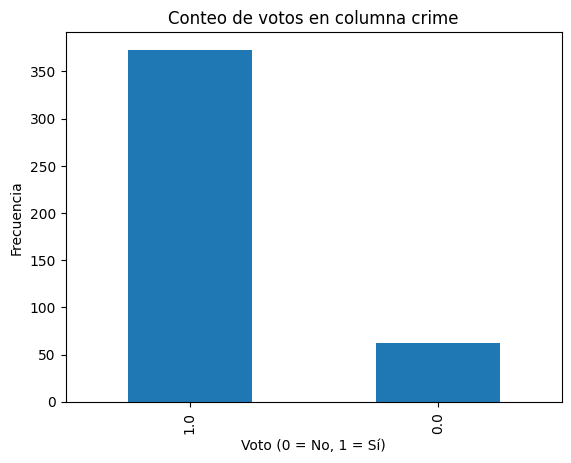

In [39]:
# Gráfico de distribución de votos columna crime, se usa diagrama de barras para visualizar la distribución de votos
df_house_votes['crime'].value_counts().plot(kind='bar')
plt.title('Conteo de votos en columna crime')
plt.xlabel('Voto (0 = No, 1 = Sí)')
plt.ylabel('Frecuencia')
plt.show()

# *** COMENTARIOS A RESULTADOS OBTENIDOS ***


# DATAFRAME df_house_votes
1. Se evidencian columnas en el documento de referencia que no hacer parte del Dataset, se eliminan para el análisis.
2. Se identifican repetidos, pero como es una votación y dos o más personas pueden votar igual, no deberían eliminarse.
3. Se identifican las variables como binarias "Binary Variables" (Bishop, 2006, p. 68). casi todas las columnas del Dataset
4. Las columnas con variables binarias no deberían tener outliers


# REFERENCIAS
Bishop, C. (2006). Pattern Recognition and Machine Learning. Information Science and Statistics.